LIBRARIES

In [12]:
import nltk
import pandas as pd
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from transformers import AutoTokenizer
from sklearn.metrics import accuracy_score

READING DATASET

In [13]:

#nltk.download('punkt')
#nltk.download('stopwords')

Urdu_StopWords =[
    "ka", "ki", "ke", "mein", "jo", "se", "aur", "bhi", "ko", "hain", 
    "hai", "theek", "kuch", "nahi", "tha", "thi", "ne", "par", "agar"
]


In [14]:
def PreProcessing_Data(Text):
    Text=str(Text)
    Text=re.sub(r'[^\w\s]','',Text)
    Text=Text.lower()
    Words=word_tokenize(Text)
    Words=[word for word in Words if word not in Urdu_StopWords]
    Cleaned_Text=" ".join(Words)

    return Cleaned_Text

Data=pd.read_csv("DataSet.csv")
Data['sentence']=Data['sentence'].apply(PreProcessing_Data)

try:
    Tokenizer=AutoTokenizer.from_pretrained("xlm-roberta-base")

    def PreProcessing_Data_With_LLM(Text):
        Tokens=Tokenizer.tokenize(Text)
        Cleaned_Text=Tokenizer.convert_tokens_to_string(Tokens)
        return Cleaned_Text
    
    Data['sentence']=Data['sentence'].apply(PreProcessing_Data_With_LLM)
except Exception as e:
    print(f"Could Not Load LLM Tokenizer {e}.")

SPLITTING DATA INTO TESTING AND TRAINING DATA

In [15]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(Data['sentence'],Data['sentiment'],test_size=0.1,random_state=42,stratify=Data['sentiment']) 
print(len(X_Train),len(X_Test),len(Y_Train),len(Y_Test))   

18206 2023 18206 2023


NLP MODEL (TF-ID + NAIVE BAYES)

In [16]:
Pipeline_Model=Pipeline([
    ('tfid',TfidfVectorizer(tokenizer=word_tokenize,stop_words=Urdu_StopWords)),
    ('classifier',MultinomialNB())
])

Pipeline_Model.fit(X_Train,Y_Train)

Test_Predictions=Pipeline_Model.predict(X_Train)
Test_Accuracy=accuracy_score(Y_Train,Test_Predictions)

print(f"Test Accuracy: {Test_Accuracy}")


c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Test Accuracy: 0.7910029660551466


PREDICTIONS

In [17]:
Data["Predictions"]=Pipeline_Model.predict(Data['sentence'])

Mapping={"Positive":0,"Negative":1,"Neutral":2}
Data['Sentiment_Score']=Data['Predictions'].map(Mapping)
Data_Grouped=Data.groupby("Date").mean(numeric_only=True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_8748\2000193239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Data["Predictions"], order=[0, 1, 2], palette="viridis")


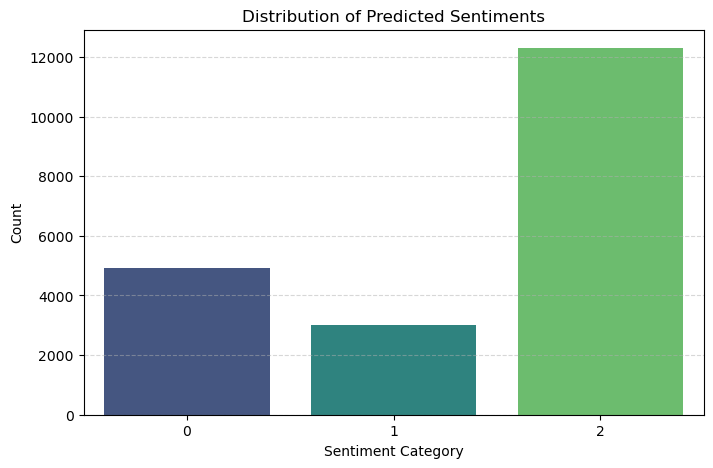

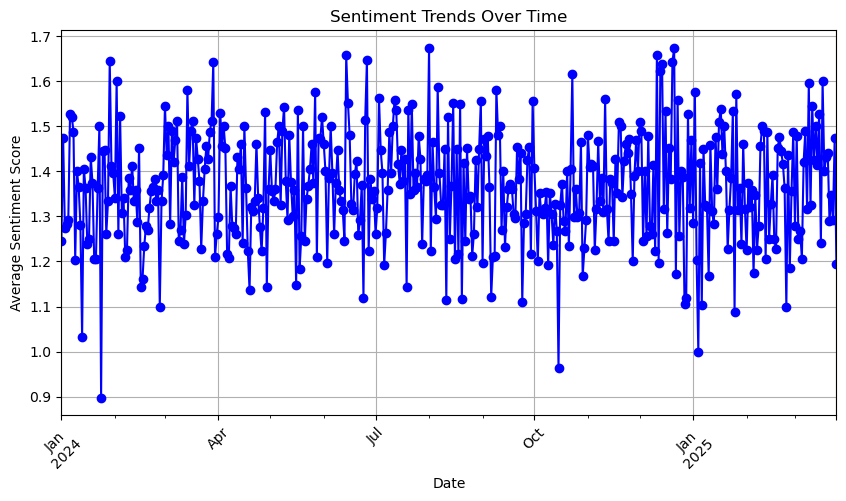

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x=Data["Predictions"], order=[0, 1, 2], palette="viridis")
plt.title("Distribution of Predicted Sentiments")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Data['Date'] = pd.to_datetime(Data['Date']) 
Data_grouped = Data.groupby('Date')['Predictions'].mean()

plt.figure(figsize=(10, 5))
Data_grouped.plot(marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trends Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [19]:
print("\nSample Processed Data:")
print(Data[["Date", "sentence","Predictions"]].head(20))


Sample Processed Data:
          Date                                           sentence  Predictions
0   2025-01-31  sai kha ya her kisi kay bus bat nhi lakin main...            2
1   2024-01-23                                          sahi bt h            2
2   2024-06-07                                             kya bt            2
3   2024-07-12                                         wah je wah            0
4   2024-04-03                                   are wha kaya bat            2
5   2024-01-25                                 wah kya baat likhi            2
6   2024-01-27                              wha itni sari khubiya            0
7   2024-05-13                                       itni khubiya            0
8   2024-07-06  ya allah rehm farma hm sab pe or zalimo hidaya...            0
9   2025-02-18  please everyone allah swt naam hamesha bary la...            0
10  2024-09-03  ya mere rab tu bra kreem hy is mulk k halat pr...            0
11  2024-11-06  jaago pakist